In [290]:
import numpy as np

indiana = np.load('../data/indianapines.npy')
indiana_corrected = indiana / indiana.max()
    
indiana_gt = np.load('../data/indianapines_gt.npy')

print(indiana_corrected.shape)
print(indiana_gt.shape)

(145, 145, 200)
(145, 145)


In [293]:
def display_img(img, title):
    r, g, b = 20, 15, 5
    img = np.array(img[:, :, [r, g, b]], dtype=float)

    pmin, pmax = np.percentile(img, (1,99), axis=(0,1))
    
    img_copy = img.copy()

    for i in range(pmin.size):
        img_copy[:,:,i] = (img[:,:,i] - pmin[i]) / (pmax[i] - pmin[i])

    img_copy[img_copy < 0] = 0
    img_copy[img_copy > 1] = 1

    plt.figure(figsize=(5,5))
    plt.title(title)
    plt.imshow(img_copy)

In [294]:
def display_img_labels(img, title):
    plt.figure(figsize=(5,5))
    plt.title(title)
    plt.imshow(img, cmap='jet')

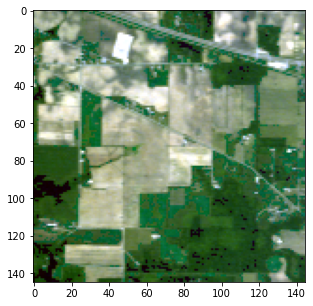

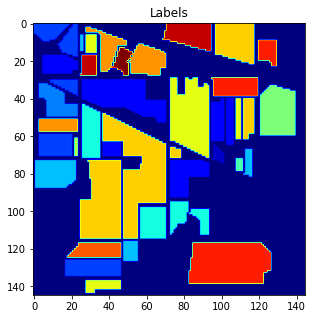

In [295]:
display_img(indiana_corrected, '')
display_img_labels(indiana_gt, 'Labels')

In [296]:
indiana_reshaped = indiana_corrected.reshape(-1, indiana_corrected.shape[2])
indiana_gt_reshaped = indiana_gt.flatten()

print(indiana_reshaped.shape)
print(indiana_gt_reshaped.shape)

(21025, 200)
(21025,)


In [306]:
from sklearn.model_selection import train_test_split

percentage_test = 0.2

train_x, test_x, train_y, test_y = train_test_split(
    indiana_reshaped, 
    indiana_gt_reshaped, 
    test_size=percentage_test, 
    random_state=1, 
    stratify=indiana_gt_reshaped
)

print(train_x.shape)
print(train_y.shape)

(16820, 200)
(16820,)


## PCA + RandomForest Classifier

In [338]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [351]:
pca_pipeline = Pipeline([
    ('pca', PCA(n_components=19)), 
    ('forest', RandomForestClassifier(n_jobs=6, max_features=6, n_estimators=500, class_weight="balanced"))
])

In [352]:
%%time
pca_pipeline.fit(train_x, train_y)
pca_pipeline.score(test_x, test_y)

CPU times: user 1min 2s, sys: 1.53 s, total: 1min 3s
Wall time: 10.4 s


0.7771700356718193

In [353]:
def display_predicted_img(labels, labels_reshaped, result):
    img = np.zeros(labels.shape[0] * labels.shape[1])
    
    i = 0
    for idx, e in enumerate(labels_reshaped):
        if e != 0:
            img[idx] = result[i]
            i += 1
        
    return np.reshape(img, labels.shape)

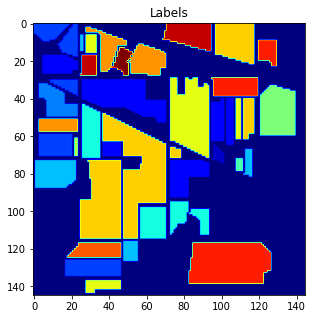

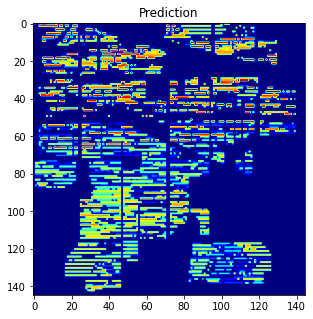

In [355]:
result = pca_pipeline.predict(indiana_reshaped)

predicted_img = display_predicted_img(indiana_gt, indiana_gt_reshaped, result)

display_img_labels(indiana_gt, 'Labels')
display_img_labels(predicted_img, 'Prediction')

ca marche pas du tout la honte